In [1]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn import set_config 

In [2]:
df = pd.read_csv("listings.csv")
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,183319,https://www.airbnb.com/rooms/183319,20220909140055,2022-09-10,previous scrape,Panoramic Ocean View Venice Beach,Craftsmen style penthouse with ocean view from...,About as close to the beach as you can live in...,https://a0.muscache.com/pictures/1170205/e2596...,867995,...,5.00,5.00,5.00,NaN,f,2,2,0,0,0.02
1,51307,https://www.airbnb.com/rooms/51307,20220909140055,2022-09-10,city scrape,Spanish Bungalow Guest House LA CA. 30 plus ni...,PRIVATE GUEST HOUSE<br /><br /><b>The space</b...,"Local LA Community , shops and restaurants in...",https://a0.muscache.com/pictures/294658/ac8d6e...,235568,...,4.85,4.95,4.76,NaN,f,2,2,0,0,0.98
2,184314,https://www.airbnb.com/rooms/184314,20220909140055,2022-09-10,previous scrape,Boho Chic Flat..Steps to Beach!,"Bright, airy, quiet 1 bdr located just steps f...",You are in one of the beach locations in Los A...,https://a0.muscache.com/pictures/0bc2f8b7-9378...,884031,...,4.93,4.89,4.85,NaN,t,1,1,0,0,0.22


In [3]:
# Extract prices from df into priceDF
priceDF = df['price']
prices=[]

# Convert prices from df into float values + append 
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
# Replace the price column in the original df with the new prices
df['price'] = prices

In [4]:
#Convert NaN to 0
df.fillna(0, inplace=True)

In [5]:
# separating dataset
airbnb_features = ["latitude", "longitude", "accommodates", "bedrooms", "beds", "minimum_nights", "maximum_nights", "number_of_reviews", "review_scores_rating", ]


y = df.price 
X = df[airbnb_features]

X.head()

,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,33.99211,-118.47600,2,2.0,2.0,30,90,3,5.00
1,34.12206,-118.26783,2,1.0,1.0,30,365,138,4.64
2,33.97487,-118.46312,1,1.0,1.0,30,30,30,4.88
3,34.00389,-118.44126,2,0.0,1.0,3,365,378,4.73
4,33.98301,-118.38607,6,2.0,3.0,30,730,2,4.00


In [6]:
y.head()

0    152.0
1     75.0
2    125.0
3    189.0
4    115.0
Name: price, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state=78)

In [8]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43524, 9)
(2291, 9)
(43524,)
(2291,)


In [9]:
set_config(print_changed_only=False) 
 
dtr = DecisionTreeRegressor()
print(dtr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=None, splitter='best')


In [10]:
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 

R-squared: 0.9999971878944586


In [11]:
ypred = dtr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  560888.6929195159
RMSE:  748.9250248986983


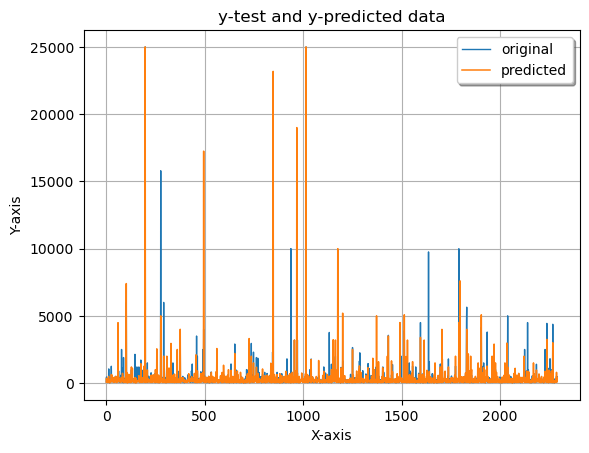

In [15]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [12]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Creating the decision tree classifier instance.
model = tree.DecisionTreeRegressor()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

In [14]:
# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([ 79., 352., 327., ...,  65., 620., 152.])